<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_101_eclat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando fim
Si `pip install fim` no funciona, intente lo sugerido en https://borgelt.net/pyfim.html

A continuación el código para instalar en gogle colab.

In [10]:
%%script bash
curl -O https://borgelt.net/bin/py3/fim.so
sudo ln -s "$(pwd)/fim.so" /usr/local/lib/python3.6/dist-packages/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  756k  100  756k    0     0   266k      0  0:00:02  0:00:02 --:--:--  265k


In [16]:
from fim import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In [25]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     

In [19]:
def loadDataset(filename):
    with open(filename, 'r') as file:
        dataset = []
        dataset1 = []
        for x in file:
            if "#" not in x:
                items = x.split()
                dataset.append([int(j) for j in items[1:]])
                if items[0] == '1':
                    dataset1.append([int(j) for j in items[1:]])

    return dataset, dataset1

In [22]:
repo = "https://raw.githubusercontent.com/pcsilcan/dm/master/20202/data/"
filename = "zoo.bin"

In [23]:
!curl -O "$repo$filename"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5017  100  5017    0     0  63506      0 --:--:-- --:--:-- --:--:-- 62712


In [24]:
d, _ = loadDataset(filename)

# All Patterns

In [26]:
def allPatterns(d, minsupp):
    s = eclat(d, target='a', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ["Patterns", "Freq"]
        return df, True
    return _, False

In [31]:
def plotAllPatterns(filename):
    numberdata = []
    d, _ = loadDataset(filename)
    k = len(d) // 20
    for i in range(k, len(d), k):
        start = time.time()
        t, r = allPatterns(d, i)
        end = time.time()
        if r:
            numberdata.append((i, t.shape[0], end - start))
    df = pd.DataFrame(numberdata)
    df.columns = ["Threshold", "AllItemsets", "TimeAllItemsets"]
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x="Threshold", y="AllItemsets", ax=ax[0], data=df)
    sns.lineplot(x="Threshold", y="TimeAllItemsets", ax=ax[1], data=df)
    fig.show()

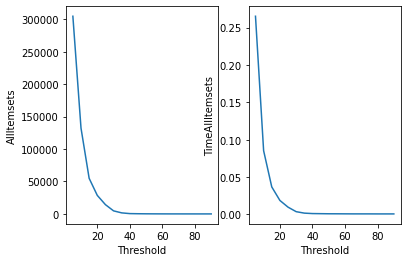

In [32]:
dfAFI = plotAllPatterns(filename)